In [2]:
import numpy as np

alldata = np.genfromtxt('ps5.data', usecols = range(15))
np.shape(alldata)

(463, 15)

In [3]:
gdata = np.empty([463, 10])
gdata[:,0] = alldata[:,1]*3600+alldata[:,2]*60+alldata[:,3]
gdata[:,1] = (np.abs(alldata[:,4])*3600+alldata[:,5]*60+alldata[:,6])*np.sign(alldata[:,4])
gdata[:,2:] = alldata[:,7:]
gdata

array([[  2.25000000e+01,   1.42184000e+05,   8.20000000e+00, ...,
          9.99900000e+01,   9.99900000e+01,   9.99900000e+01],
       [  1.18100000e+02,  -5.56590000e+04,   9.20000000e-01, ...,
          5.00000000e-02,   1.23500000e+01,   3.00000000e-02],
       [  3.31800000e+02,  -1.01153000e+05,   1.04000000e+01, ...,
          5.00000000e-02,   1.58200000e+01,   4.00000000e-02],
       ..., 
       [  5.00735000e+04,   1.52750000e+04,   2.59000000e+00, ...,
          1.20000000e-01,   1.85400000e+01,   1.10000000e-01],
       [  5.84279000e+04,   1.95736000e+05,   1.93000000e+00, ...,
          9.99900000e+01,   1.91100000e+01,   6.00000000e-02],
       [  8.55340000e+04,   1.39384000e+05,   2.54000000e+00, ...,
          6.00000000e-02,   1.70000000e+01,   4.00000000e-02]])

In [4]:
import fsps
sp = fsps.StellarPopulation(imf_type = 2, zmet = 6., sfh = 1, tau= 100., const = 1)


In [5]:
# make a loop of different sf_trunc and get mags times to match. Then there should be a relation. Convert to M per yr and AB mag
d = np.random.uniform(-2,2)
sfr1 = 10**(d)
sp.params['sf_trunc'] = sfr1
magnow = sp.get_mags(tage=0, bands=['galex_fuv'])
print(sfr1, magnow[0])
sp.sfr

0.021292511259259357 [ 4.54304333]


array([  4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   4.69648689e-08,
         4.69648689e-08,   4.69648689e-08,   0.00000000e+00,
         0.00000000e+00,

In [6]:
mags = []
sfrs = []
for i in range(100):
    d = np.random.uniform(-2,1)
    sfr1 = 10**(d)
    sp.params['sf_trunc'] = sfr1
    magnow = sp.get_mags(tage=0, bands=['galex_fuv'])
    mags.append(magnow[0])
    sfrs.append(sfr1)

mags = np.asarray(mags)
sfrs = np.asarray(sfrs)

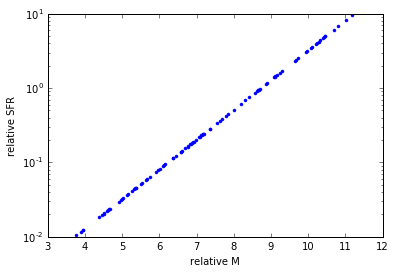

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.semilogy(mags, sfrs, '.')
plt.xlabel('relative M')
plt.ylabel('relative SFR')


In [8]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.ravel(mags), np.log10(sfrs))

In [9]:
# relative M/yr = relative M * .4- 3.5

print(slope, intercept)

0.4 -3.4889904466


1.0 32.4403187509


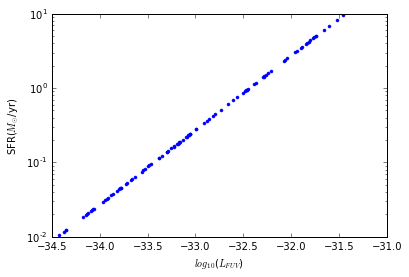

In [32]:
F_nuv = 10**(-.4*(np.ravel(mags)+48.6))
L_nuv = 4*np.pi*(10*3.08e18)**2* F_nuv
powL_nuv = L_nuv*(3e18/1528.) 

plt.semilogy(-np.log10(powL_nuv), sfrs, '.')
plt.xlabel('$log_{10}$($L_{FUV}$)')
plt.ylabel('SFR($M_{\odot}$/yr)')

slope, intercept, r_value, p_value, std_err = stats.linregress(-np.log10(powL_nuv), np.log10(sfrs))
print(slope, intercept)

The paper reports an offset constant of 43.5, which is much larger than that of the offset I found. :/